<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Libraries-Used" data-toc-modified-id="Libraries-Used-0.1">Libraries Used</a></span></li><li><span><a href="#Data-Science-Lifecycle" data-toc-modified-id="Data-Science-Lifecycle-0.2">Data Science Lifecycle</a></span></li></ul></li><li><span><a href="#Business-Understanding" data-toc-modified-id="Business-Understanding-1">Business Understanding</a></span><ul class="toc-item"><li><span><a href="#Questions" data-toc-modified-id="Questions-1.1">Questions</a></span></li><li><span><a href="#Objectives" data-toc-modified-id="Objectives-1.2">Objectives</a></span></li><li><span><a href="#Import-Cleaned-Banking-Data" data-toc-modified-id="Import-Cleaned-Banking-Data-1.3">Import Cleaned Banking Data</a></span></li><li><span><a href="#Official-Exploratory-Data-Analysis" data-toc-modified-id="Official-Exploratory-Data-Analysis-1.4">Official Exploratory Data Analysis</a></span><ul class="toc-item"><li><span><a href="#The-'job',-'education',-and-'y'-Columns-Bar-Graphs" data-toc-modified-id="The-'job',-'education',-and-'y'-Columns-Bar-Graphs-1.4.1">The 'job', 'education', and 'y' Columns Bar Graphs</a></span></li><li><span><a href="#The-'age',-'job',-and-'education'-Columns-Violin-Plots" data-toc-modified-id="The-'age',-'job',-and-'education'-Columns-Violin-Plots-1.4.2">The 'age', 'job', and 'education' Columns Violin Plots</a></span></li><li><span><a href="#The-'previous',--'month',-and-'y'-Columns-Combined-Point-Plot-and-Bar-Graphs" data-toc-modified-id="The-'previous',--'month',-and-'y'-Columns-Combined-Point-Plot-and-Bar-Graphs-1.4.3">The 'previous',  'month', and 'y' Columns Combined Point Plot and Bar Graphs</a></span></li></ul></li></ul></li><li><span><a href="#Feature-Engineering" data-toc-modified-id="Feature-Engineering-2">Feature Engineering</a></span><ul class="toc-item"><li><span><a href="#Transforming-Categorical-Variables" data-toc-modified-id="Transforming-Categorical-Variables-2.1">Transforming Categorical Variables</a></span></li><li><span><a href="#Store-Variables-for-Next-Notebook" data-toc-modified-id="Store-Variables-for-Next-Notebook-2.2">Store Variables for Next Notebook</a></span></li><li><span><a href="#Other-Resources:" data-toc-modified-id="Other-Resources:-2.3">Other Resources:</a></span></li></ul></li></ul></div>

## Libraries Used

In [834]:
import re
import datetime
from datetime import datetime
import xlsxwriter

import pandas as pd
import statistics 
import scipy.stats as stats
import seaborn as sns
from scipy.stats import pointbiserialr
import statsmodels.formula.api as smf
import statsmodels.api as sm
from statsmodels.formula.api import ols
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectFromModel
import matplotlib.pyplot as plt
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
from sklearn.metrics import roc_curve, auc, confusion_matrix
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report
from sklearn.metrics import make_scorer, plot_confusion_matrix, precision_recall_curve
from imblearn.over_sampling import SMOTE
from imblearn.pipeline import Pipeline as imPipeline
from imblearn.pipeline import make_pipeline as impipemaker
import time
#%matplotlib inline


## Data Science Lifecycle
Like with every project, we must first look to map for our data filled journey:
![DataScienceLifecycle](./Data_Science_Process.png)

We use the above Data Science Lifecyle to structure and organize this project. In this project we will follow this structure. We will see, at times, these steps will be revisited.
# Business Understanding
From above, we see at "01" that we must obtain ask ourselves relevant questions and define objectives:
## Questions
* "What is the main goal of this analysis?"
    * **To understand which games result in highest game downloads**
* "Why did you pick those features as predictors?"
    * **These features will have p-values less than 0.05 and be associated with the games that have been downloaded the most**
* "How confident are you in the predictive quality of the results?"
    * **Because we are only going to use features that have p-values less than 0.05, there is a 5% risk of concluding that these features influence gamers when there is no actual influence.**
* "What are some of the things that could cause the results to be wrong?"
    * **Undetected collinearity, bias variance or inappropriate data exclusion.**

## Objectives
* Obtain dataset from Steam API
* Clean, explore, and model this dataset with multiple machine learning algorithms to predict which game features resulted in high downloads.
* Render at least 3 business recommendations that are supported.
* Demonstrate explored methods with benchmarks.
* Present 3 or more relevant visualizations. 
* Compare multiple models that were in and outside class material.
* Design a live demo that changes parameters and shows the output.
* Code following pep-8 standards, with docstrings/comments, and does not repeat itself; also uses cusotm classes methods for tasks.
* Conclusion is present and contains at least 3 recommendations that are business relevant.

# Distribution Check for Each Column and Transformation if Necessary
Now that we have cleaned our data quite a bit, let us clean it further by getting rid of columns not necessary for the analysis.

In [835]:
# %%capture 
# #If this is your first time running my notebook or you skipped, run the below commented out code to run the necessary notebooks
# %run ./Preprocessing.ipynb

%store -r

In [836]:
# Make sure everything was imported correctly
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7233 entries, 0 to 7232
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Title:                              7232 non-null   object  
 1   appid:                              7233 non-null   int64   
 2   Description:                        7233 non-null   object  
 3   Developer:                          7233 non-null   object  
 4   Publisher:                          7233 non-null   object  
 5   Genre:                              7233 non-null   object  
 6   Tags:                               7233 non-null   object  
 7   Category:                           7233 non-null   object  
 8   Release date:                       7233 non-null   object  
 9   Price:                              7233 non-null   float64 
 10  Owners (7 day average):             7233 non-null   float64 
 11  Old userscore:                

In [837]:
# Drop all columns not relevant to the analysis and Owners (7 day average) b/c it will highly correlate
# Note 'Developer', and 'Publisher' b/c we assume we are developing our own game
df_stats.drop(columns=['Title:', 'appid:', 'Description:', 'Developer:', 'Publisher:', 'Genre:', 'Tags:', 'Category:',
                 'Release date:', 'Owners (7 day average):', 'Gross Profit', 'Rating1', 'Rating2', 'Rating3', 'Rating4'], inplace=True)
df_stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7233 entries, 0 to 7232
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype   
---  ------                              --------------  -----   
 0   Price:                              7233 non-null   float64 
 1   Old userscore:                      7233 non-null   object  
 2   Peak concurrent players yesterday:  7233 non-null   object  
 3   Genres:                             7233 non-null   object  
 4   NumOfGenres:                        7233 non-null   float64 
 5   NumOfLanguages:                     7233 non-null   float64 
 6   TopTag:                             7233 non-null   object  
 7   NumOfTags:                          7233 non-null   float64 
 8   NumOfCats:                          7233 non-null   float64 
 9   Month:                              7233 non-null   object  
 10  Day:                                7233 non-null   object  
 11  Year:                         

Let us start our analysis by looking at a scatter matrix of all our data

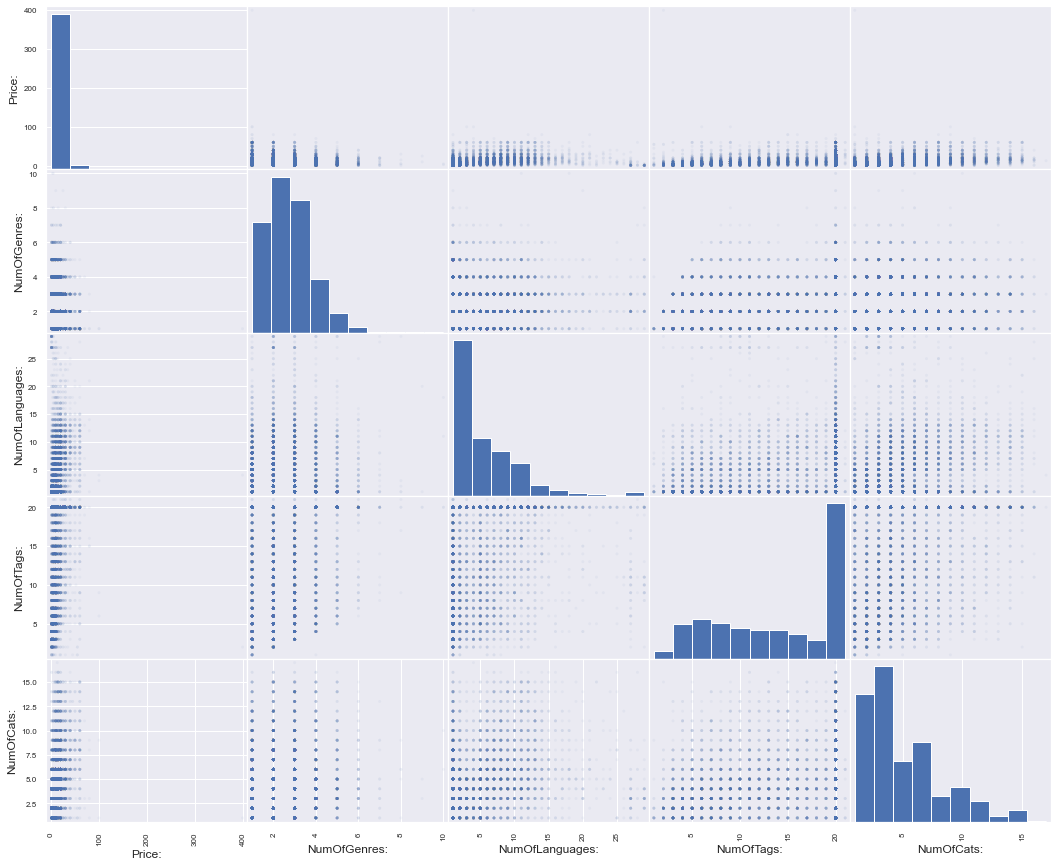

In [838]:
sns.set(context='notebook')
pd.plotting.scatter_matrix(df_stats, alpha=0.05, figsize=[18,15]) #Let's look at the scatter plot of all the features
plt.show()

**IMPORTANT NOTE: Below we will split the data into a train and test set for model creation later on. This is to prevent data leakage and to truly make predictive models. Everything we do to the features in the train data, we will also do to the features in the test data.**

In [839]:
rand_state = 24

y = df_stats['Ownership_Above_Normal'].copy() # Makes copy of target variable to protect original dataframe
X = df_stats.drop(columns='Ownership_Above_Normal', axis=1).copy() # Features
X_train_70, X_test_30, y_train_70, y_test_30 = train_test_split(X, y, test_size=0.30, random_state=rand_state)

We will just focus on the X_train_70 for our data cleaning, but we will apply all changes to all train and test data.

In [840]:
X_train_70.info() # tells the number of columns and entries for each column with data type.

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5063 entries, 5576 to 4514
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Price:                              5063 non-null   float64
 1   Old userscore:                      5063 non-null   object 
 2   Peak concurrent players yesterday:  5063 non-null   object 
 3   Genres:                             5063 non-null   object 
 4   NumOfGenres:                        5063 non-null   float64
 5   NumOfLanguages:                     5063 non-null   float64
 6   TopTag:                             5063 non-null   object 
 7   NumOfTags:                          5063 non-null   float64
 8   NumOfCats:                          5063 non-null   float64
 9   Month:                              5063 non-null   object 
 10  Day:                                5063 non-null   object 
 11  Year:                               5063

## Continuous Data: Finding the 'weird' columns
From above, we see that all columns have 28831 non-null entires. All our other train and test data will also have no non-null values/objects. Let's look at the stats for each column as well:

NOTE: only works for integer valued features and not categorical features.

In [841]:
X_train_70.describe() # helps us see how skewed the data is by comparing the column's mean to the column's 50% quartile.

,Price:,NumOfGenres:,NumOfLanguages:,NumOfTags:,NumOfCats:
count,5063.000000,5063.000000,5063.000000,5063.000000,5063.000000
mean,13.136012,2.444598,5.319968,13.424452,4.963263
std,12.719799,1.187167,5.234064,6.256642,3.223321
min,0.900000,1.000000,1.000000,1.000000,1.000000
25%,4.990000,2.000000,1.000000,8.000000,3.000000
50%,9.990000,2.000000,4.000000,14.000000,4.000000
75%,19.960000,3.000000,8.000000,20.000000,6.000000
max,399.000000,10.000000,29.000000,21.000000,16.000000


From the above, we see that there are extreme values, high STDs, and means not close to 50%. Let us look at 'Price:' first, then we will look at the others. 'age' has a high std and extreme max value of 98. Let's take a closer look at it.

### The 'Price:' Column

C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


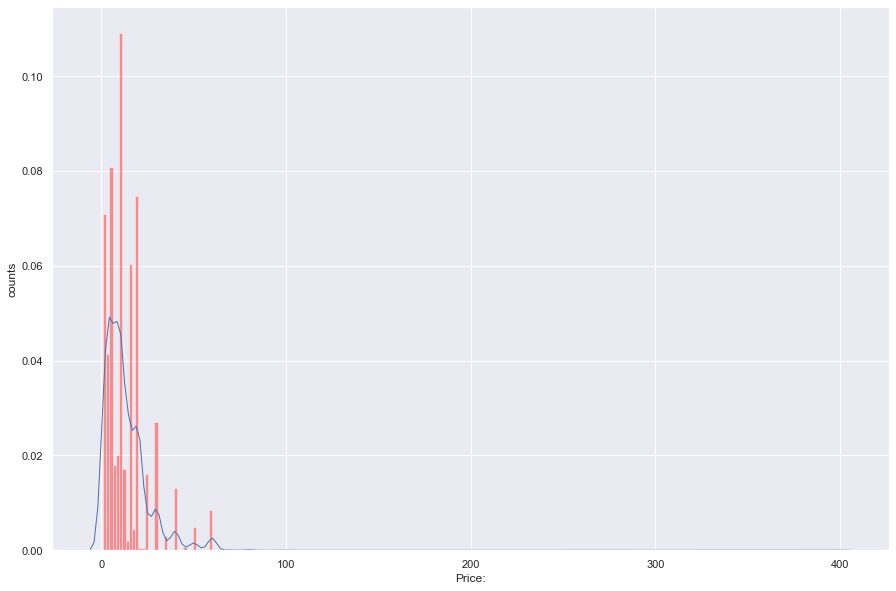

In [842]:
plt.figure(figsize=(15,10))
plt.xlabel('Price')
plt.ylabel('counts')
col = 'Price'
#This shows the distribution of the points
sns.distplot(X_train_70['Price:'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

We can check the skewness and kurtosis with Scipy. The one with pairs that are closest to 0 means closer to being normally distributed.

In [843]:
# Original data
stats.skew(X_train_70['Price:'])

6.921668809010195

We see above that our 'Price:' column is highly right skewed, so we will try to log transform it to see if that helps make the data more normally distributed:

C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


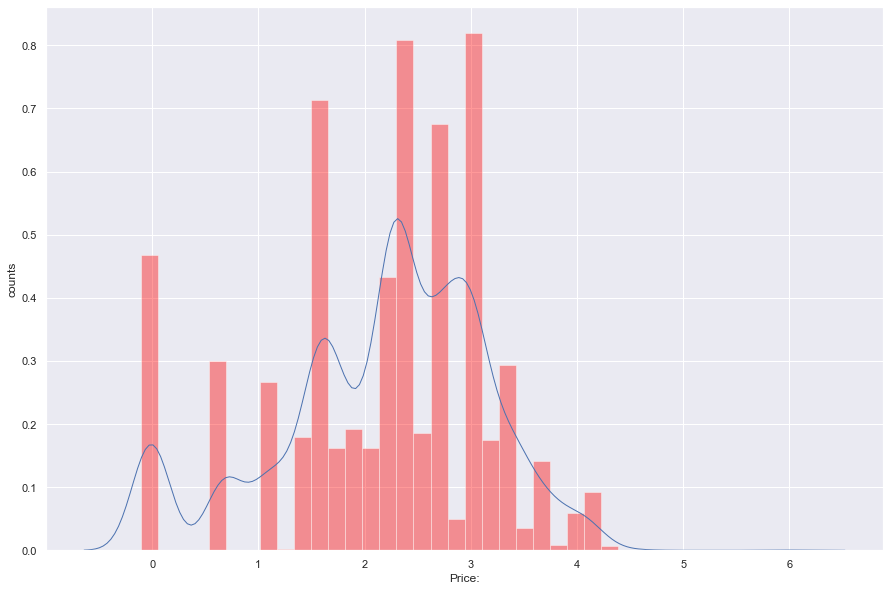

In [844]:
plt.figure(figsize=(15,10))
plt.xlabel('Price')
plt.ylabel('counts')
col = 'Price'
#This shows the distribution of the points
sns.distplot(np.log(X_train_70['Price:']), bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

In [845]:
stats.skew(np.log(X_train_70['Price:']))

-0.5584698383324403

Doing the log transformation on this data made it a lot more normally distributed. Let us look at others and their associated skew values:

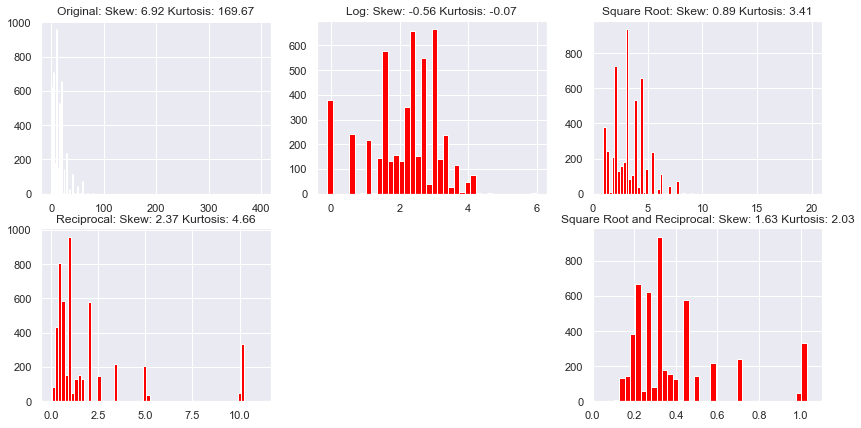

In [846]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['Price:'], bins='auto', color='red')
ax.set_title('Original: '+'Skew: '+str(round(stats.skew(X_train_70['Price:']), 2))+ ' Kurtosis: '+str(
              round(stats.kurtosis(X_train_70['Price:']), 2)))

plt.subplot(232)
ax1 = pd.plotting.hist_series(np.log(X_train_70['Price:']), bins='auto', color='red')
ax1.set_title('Log: '+'Skew: '+str(round(stats.skew(np.log(X_train_70['Price:'])), 2))+ ' Kurtosis: '+
              str(round(stats.kurtosis(np.log(X_train_70['Price:'])), 2)))

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['Price:']), bins='auto', color='red')
ax2. set_title('Square Root: '+'Skew: '+str(round(stats.skew(np.sqrt(X_train_70['Price:'])), 2))+ ' Kurtosis: '+ 
               str(round(stats.kurtosis(np.sqrt(X_train_70['Price:'])), 2)))

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['Price:'].apply(lambda x: 10/x), bins='auto', color='red')
ax3.set_title('Reciprocal: '+'Skew: '+str(round(stats.skew(X_train_70['Price:'].apply(lambda x: 10/x)), 2))+
              ' Kurtosis: '+str(round(stats.kurtosis(X_train_70['Price:'].apply(lambda x: 10/x)), 2)))

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['Price:'])), bins='auto', color='red')
ax5.set_title('Square Root and Reciprocal: '+'Skew: '+str(round(
    stats.skew(np.reciprocal(np.sqrt(X_train_70['Price:']))), 2))+' Kurtosis: '+str(round(
    stats.kurtosis(np.reciprocal(np.sqrt(X_train_70['Price:']))), 2)))

plt.show()

From above we can see that the best transformation appears to be the log transformation. Let us make this transformation permanent:

In [847]:
np.log(X_train_70['Price:']).describe()

count    5063.000000
mean        2.170821
std         0.983031
min        -0.105361
25%         1.607436
50%         2.301585
75%         2.993730
max         5.988961
Name: Price:, dtype: float64

In [848]:
X_train_70.loc[:, 'Price:'] = np.log(X_train_70.loc[:, 'Price:'])
X_test_30.loc[:, 'Price:'] = np.log(X_test_30.loc[:, 'Price:'])
X_train_70['Price:'].describe()

C:\Users\johnh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


count    5063.000000
mean        2.170821
std         0.983031
min        -0.105361
25%         1.607436
50%         2.301585
75%         2.993730
max         5.988961
Name: Price:, dtype: float64

### NumOfGenres:	
We do the same thing we did above:

C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


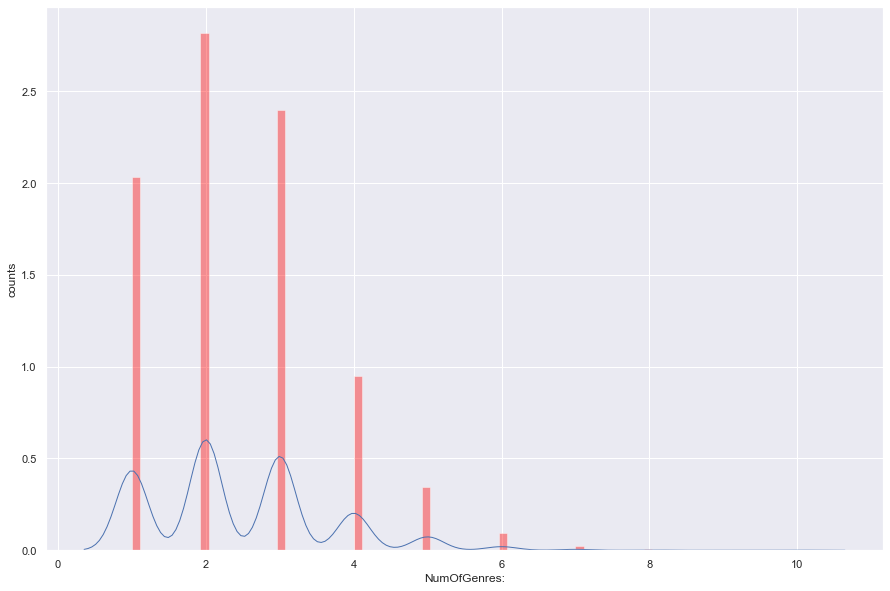

In [849]:
plt.figure(figsize=(15,10))
plt.xlabel('Number of Genres')
plt.ylabel('counts')
col = 'NumOfGenres:'
#This shows the distribution of the points
sns.distplot(X_train_70['NumOfGenres:'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

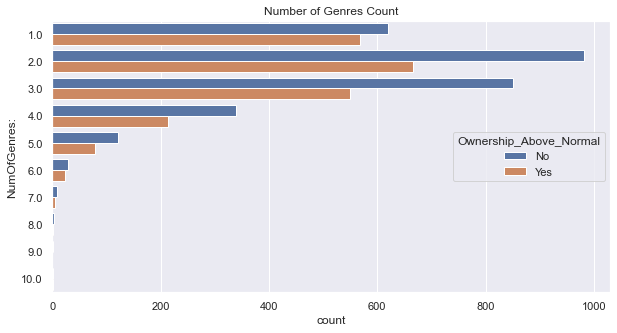

In [850]:
# This graph gives us a little glimps in how 'number of tags' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(10,5))
graph = sns.countplot(y=X_train_70['NumOfGenres:'], hue=y_train_70, orient="v")
plt.title('Number of Genres Count')


plt.show()

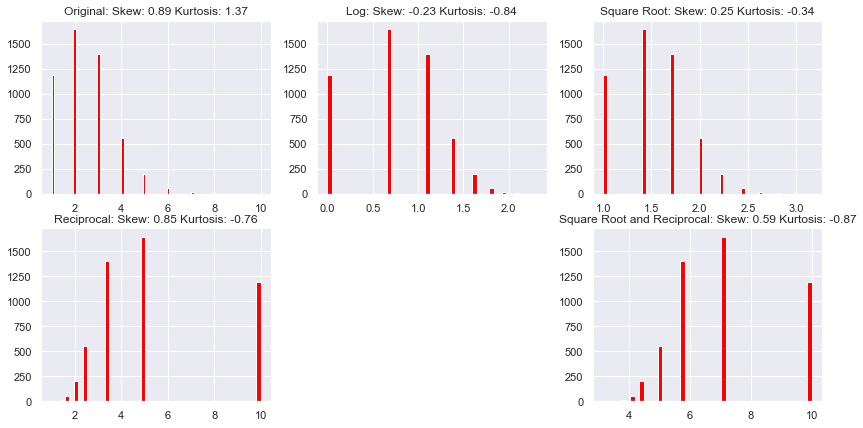

In [851]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['NumOfGenres:'], bins='auto', color='red')
ax.set_title('Original: '+'Skew: '+str(round(stats.skew(X_train_70['NumOfGenres:']), 2))+' Kurtosis: '+
             str(round(stats.kurtosis(X_train_70['NumOfGenres:']), 2)))

plt.subplot(232)
ax1 = pd.plotting.hist_series(np.log(X_train_70['NumOfGenres:']), bins='auto', color='red')
ax1.set_title('Log: '+'Skew: '+str(round(stats.skew(np.log(X_train_70['NumOfGenres:'])), 2))+ ' Kurtosis: '+
             str(round(stats.kurtosis(np.log(X_train_70['NumOfGenres:'])), 2)))

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['NumOfGenres:']), bins='auto', color='red')
ax2. set_title('Square Root: '+'Skew: '+str(round(stats.skew(np.sqrt(X_train_70['NumOfGenres:'])), 2))+
               ' Kurtosis: '+ str(round(stats.kurtosis(np.sqrt(X_train_70['NumOfGenres:'])), 2)))

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['NumOfGenres:'].apply(lambda x: 10/x), bins='auto', color='red')
ax3.set_title('Reciprocal: '+'Skew: '+str(round(stats.skew(X_train_70['NumOfGenres:'].apply(lambda x: 10/x)), 2))
              +' Kurtosis: '+str(round(stats.kurtosis(X_train_70['NumOfGenres:'].apply(lambda x: 10/x)), 2)))

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['NumOfGenres:'])).apply(lambda x: x*10), bins='auto', color='red')
ax5.set_title('Square Root and Reciprocal: '+'Skew: '+str(round(
    stats.skew(np.reciprocal(np.sqrt(X_train_70['NumOfGenres:'])).apply(lambda x: x*10)), 2))+' Kurtosis: '+
             str(round(stats.kurtosis(np.reciprocal(np.sqrt(X_train_70['NumOfGenres:'])).apply(lambda x: x*10)), 2)))

plt.show()

From above we can see that the best transformation appears to be the square root transformation since it has skew and kurtosis values closest to zero. Let us make this transformation permanent:

In [852]:
np.sqrt(X_train_70['NumOfGenres:']).describe()

count    5063.000000
mean        1.517923
std         0.374880
min         1.000000
25%         1.414214
50%         1.414214
75%         1.732051
max         3.162278
Name: NumOfGenres:, dtype: float64

In [853]:
X_train_70.loc[:, 'NumOfGenres:']=np.sqrt(X_train_70.loc[:, 'NumOfGenres:'])
X_test_30.loc[:, 'NumOfGenres:']=np.sqrt(X_test_30.loc[:, 'NumOfGenres:'])
X_train_70['NumOfGenres:'].describe()

C:\Users\johnh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


count    5063.000000
mean        1.517923
std         0.374880
min         1.000000
25%         1.414214
50%         1.414214
75%         1.732051
max         3.162278
Name: NumOfGenres:, dtype: float64

### NumOfLanguages:	
We do the same thing we did above:

C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


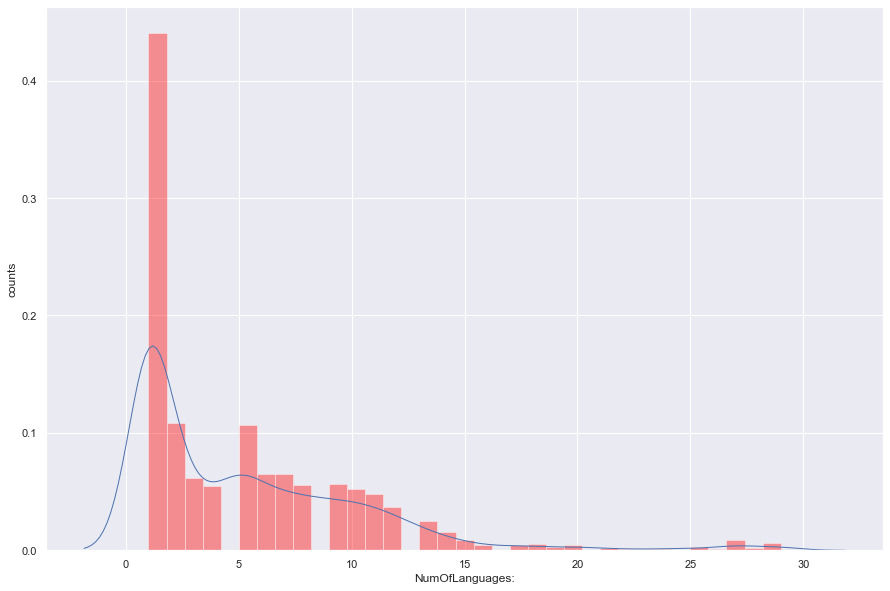

In [854]:
plt.figure(figsize=(15,10))
plt.xlabel('Number of Languages')
plt.ylabel('counts')
col = 'NumOfLanguages:'
#This shows the distribution of the points
sns.distplot(X_train_70['NumOfLanguages:'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

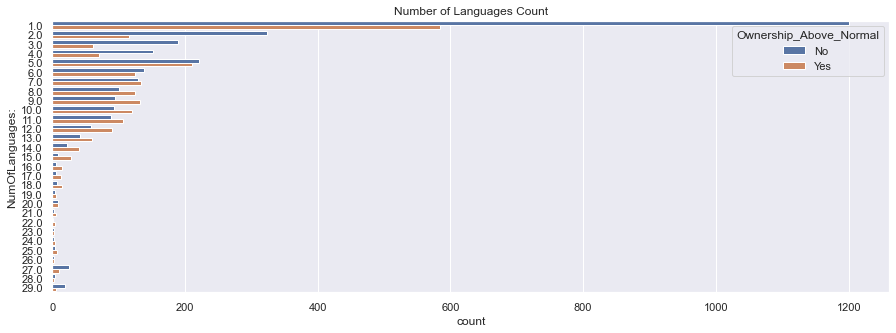

In [855]:
# This graph gives us a little glimps in how 'number of tags' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(15,5))
graph = sns.countplot(y=X_train_70['NumOfLanguages:'], hue=y_train_70, orient="v")
plt.title('Number of Languages Count')


plt.show()

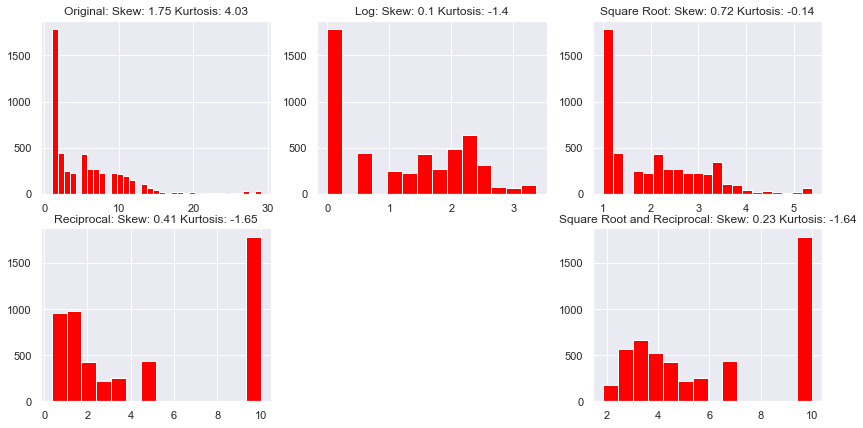

In [856]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['NumOfLanguages:'], bins='auto', color='red')
ax.set_title('Original: '+'Skew: '+str(round(stats.skew(X_train_70['NumOfLanguages:']), 2))+' Kurtosis: '+
             str(round(stats.kurtosis(X_train_70['NumOfLanguages:']), 2)))

plt.subplot(232)
ax1 = pd.plotting.hist_series(np.log(X_train_70['NumOfLanguages:']), bins='auto', color='red')
ax1.set_title('Log: '+'Skew: '+str(round(stats.skew(np.log(X_train_70['NumOfLanguages:'])), 2))+ ' Kurtosis: '+
             str(round(stats.kurtosis(np.log(X_train_70['NumOfLanguages:'])), 2)))

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['NumOfLanguages:']), bins='auto', color='red')
ax2. set_title('Square Root: '+'Skew: '+str(round(stats.skew(np.sqrt(X_train_70['NumOfLanguages:'])), 2))+
               ' Kurtosis: '+ str(round(stats.kurtosis(np.sqrt(X_train_70['NumOfLanguages:'])), 2)))

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['NumOfLanguages:'].apply(lambda x: 10/x), bins='auto', color='red')
ax3.set_title('Reciprocal: '+'Skew: '+str(round(stats.skew(X_train_70['NumOfLanguages:'].apply(lambda x: 10/x)), 2))
              +' Kurtosis: '+str(round(stats.kurtosis(X_train_70['NumOfLanguages:'].apply(lambda x: 10/x)), 2)))

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['NumOfLanguages:'])).apply(lambda x: x*10), bins='auto', color='red')
ax5.set_title('Square Root and Reciprocal: '+'Skew: '+str(round(
    stats.skew(np.reciprocal(np.sqrt(X_train_70['NumOfLanguages:'])).apply(lambda x: x*10)), 2))+' Kurtosis: '+
             str(round(stats.kurtosis(np.reciprocal(np.sqrt(X_train_70['NumOfLanguages:'])).apply(lambda x: x*10)), 2)))

plt.show()

From above we can see that the best transformation appears to be the square root transformation since it has skew and kurtosis values closest to zero. Let us make this transformation permanent:

In [857]:
np.sqrt(X_train_70['NumOfLanguages:']).describe()

count    5063.000000
mean        2.056783
std         1.043948
min         1.000000
25%         1.000000
50%         2.000000
75%         2.828427
max         5.385165
Name: NumOfLanguages:, dtype: float64

In [858]:
X_train_70.loc[:, 'NumOfLanguages:']=np.sqrt(X_train_70.loc[:, 'NumOfLanguages:'])
X_test_30.loc[:, 'NumOfLanguages:']=np.sqrt(X_test_30.loc[:, 'NumOfLanguages:'])
X_train_70['NumOfLanguages:'].describe()

C:\Users\johnh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


count    5063.000000
mean        2.056783
std         1.043948
min         1.000000
25%         1.000000
50%         2.000000
75%         2.828427
max         5.385165
Name: NumOfLanguages:, dtype: float64

### NumOfTags:	
We do the same thing we did above:

C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


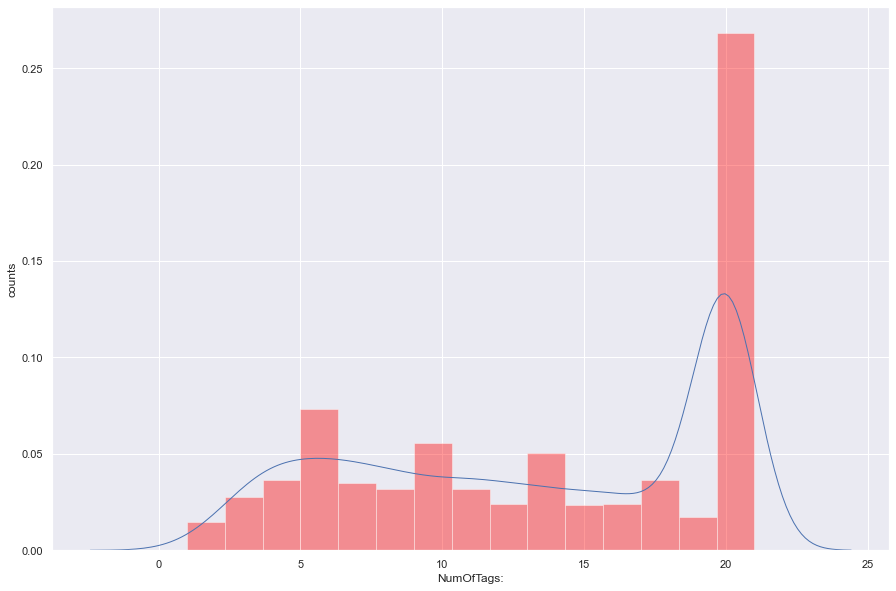

In [859]:
plt.figure(figsize=(15,10))
plt.xlabel('Number of Tags')
plt.ylabel('counts')
col = 'NumOfTags:'
#This shows the distribution of the points
sns.distplot(X_train_70['NumOfTags:'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

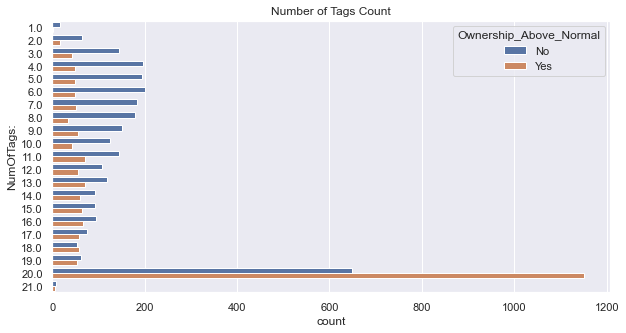

In [860]:
# This graph gives us a little glimps in how 'number of tags' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(10,5))
graph = sns.countplot(y=X_train_70['NumOfTags:'], hue=y_train_70, orient="v")
plt.title('Number of Tags Count')


plt.show()

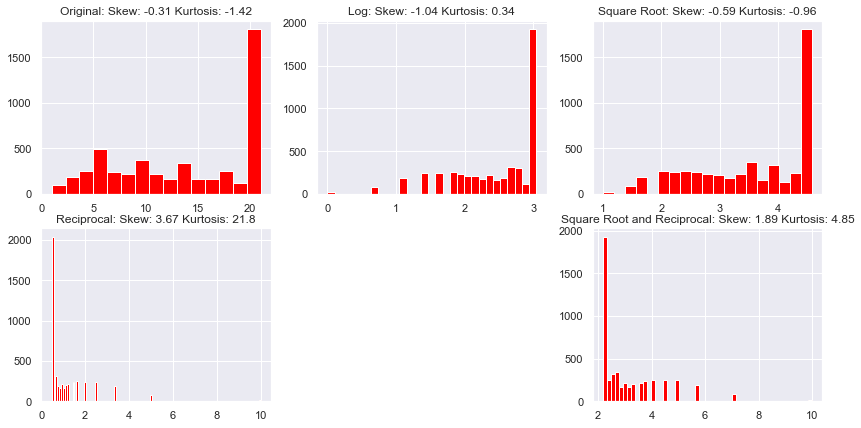

In [861]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['NumOfTags:'], bins='auto', color='red')
ax.set_title('Original: '+'Skew: '+str(round(stats.skew(X_train_70['NumOfTags:']), 2))+' Kurtosis: '+
             str(round(stats.kurtosis(X_train_70['NumOfTags:']), 2)))

plt.subplot(232)
ax1 = pd.plotting.hist_series(np.log(X_train_70['NumOfTags:']), bins='auto', color='red')
ax1.set_title('Log: '+'Skew: '+str(round(stats.skew(np.log(X_train_70['NumOfTags:'])), 2))+ ' Kurtosis: '+
             str(round(stats.kurtosis(np.log(X_train_70['NumOfTags:'])), 2)))

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['NumOfTags:']), bins='auto', color='red')
ax2. set_title('Square Root: '+'Skew: '+str(round(stats.skew(np.sqrt(X_train_70['NumOfTags:'])), 2))+
               ' Kurtosis: '+ str(round(stats.kurtosis(np.sqrt(X_train_70['NumOfTags:'])), 2)))

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['NumOfTags:'].apply(lambda x: 10/x), bins='auto', color='red')
ax3.set_title('Reciprocal: '+'Skew: '+str(round(stats.skew(X_train_70['NumOfTags:'].apply(lambda x: 10/x)), 2))
              +' Kurtosis: '+str(round(stats.kurtosis(X_train_70['NumOfTags:'].apply(lambda x: 10/x)), 2)))

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['NumOfTags:'])).apply(lambda x: x*10), bins='auto', color='red')
ax5.set_title('Square Root and Reciprocal: '+'Skew: '+str(round(
    stats.skew(np.reciprocal(np.sqrt(X_train_70['NumOfTags:'])).apply(lambda x: x*10)), 2))+' Kurtosis: '+
             str(round(stats.kurtosis(np.reciprocal(np.sqrt(X_train_70['NumOfTags:'])).apply(lambda x: x*10)), 2)))

plt.show()

From above we can see that the best transformation appears to be the square root transformation since it has skew and kurtosis values closest to zero. Let us make this transformation permanent:

In [862]:
np.sqrt(X_train_70['NumOfTags:']).describe()

count    5063.000000
mean        3.537728
std         0.953475
min         1.000000
25%         2.828427
50%         3.741657
75%         4.472136
max         4.582576
Name: NumOfTags:, dtype: float64

In [863]:
X_train_70.loc[:, 'NumOfTags:']=np.sqrt(X_train_70.loc[:, 'NumOfTags:'])
X_test_30.loc[:, 'NumOfTags:']=np.sqrt(X_test_30.loc[:, 'NumOfTags:'])
X_train_70['NumOfTags:'].describe()

C:\Users\johnh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


count    5063.000000
mean        3.537728
std         0.953475
min         1.000000
25%         2.828427
50%         3.741657
75%         4.472136
max         4.582576
Name: NumOfTags:, dtype: float64

### NumOfCats:	
We do the same thing we did above:

C:\Users\johnh\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


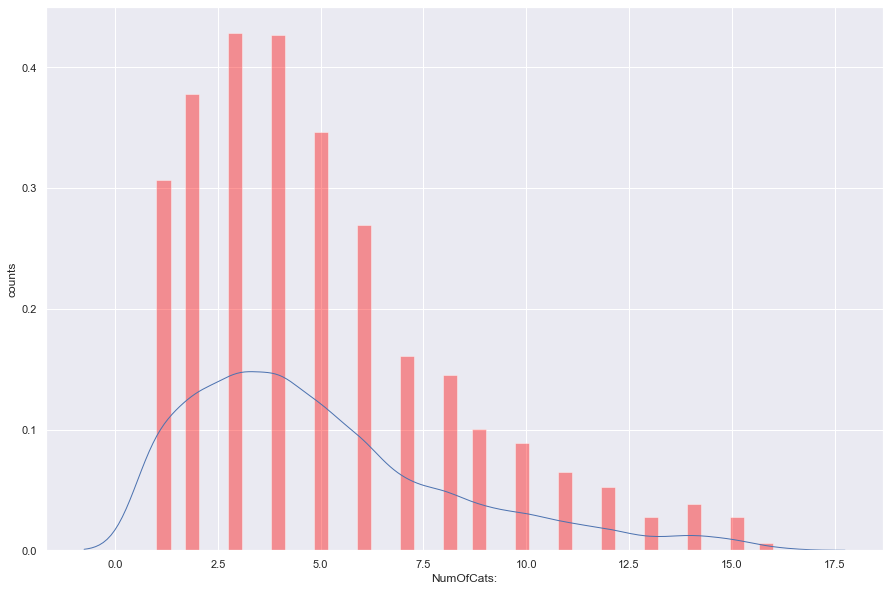

In [864]:
plt.figure(figsize=(15,10))
plt.xlabel('Number of Categories')
plt.ylabel('counts')
col = 'NumOfCats:'
#This shows the distribution of the points
sns.distplot(X_train_70['NumOfCats:'], bins='auto', color='red', label=col+' histogram', kde=True, kde_kws={"color": "b", "lw": 1, "label":col+" kde"})
plt.show()

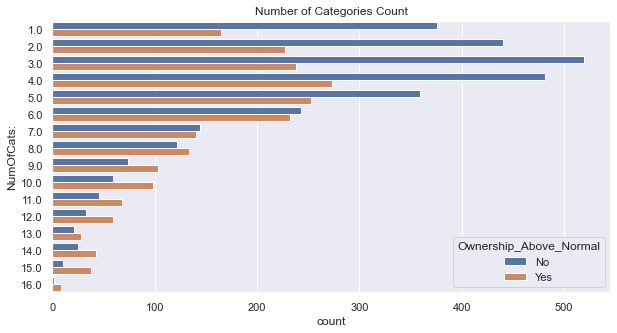

In [865]:
# This graph gives us a little glimps in how 'number of categories' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(10,5))
graph = sns.countplot(y=X_train_70['NumOfCats:'], hue=y_train_70, orient="v")
plt.title('Number of Categories Count')


plt.show()

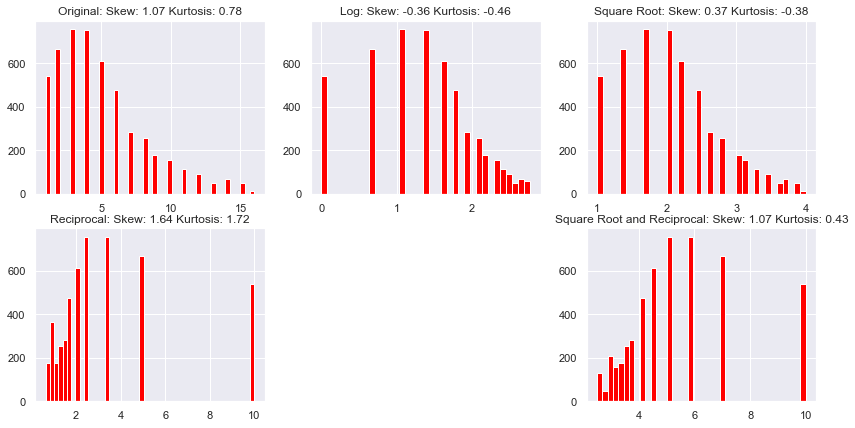

In [866]:
plt.figure(figsize=(14,7))

plt.subplot(231)
ax = pd.plotting.hist_series(X_train_70['NumOfCats:'], bins='auto', color='red')
ax.set_title('Original: '+'Skew: '+str(round(stats.skew(X_train_70['NumOfCats:']), 2))+' Kurtosis: '+
             str(round(stats.kurtosis(X_train_70['NumOfCats:']), 2)))

plt.subplot(232)
ax1 = pd.plotting.hist_series(np.log(X_train_70['NumOfCats:']), bins='auto', color='red')
ax1.set_title('Log: '+'Skew: '+str(round(stats.skew(np.log(X_train_70['NumOfCats:'])), 2))+ ' Kurtosis: '+
             str(round(stats.kurtosis(np.log(X_train_70['NumOfCats:'])), 2)))

plt.subplot(233)
ax2 = pd.plotting.hist_series(np.sqrt(X_train_70['NumOfCats:']), bins='auto', color='red')
ax2. set_title('Square Root: '+'Skew: '+str(round(stats.skew(np.sqrt(X_train_70['NumOfCats:'])), 2))+
               ' Kurtosis: '+ str(round(stats.kurtosis(np.sqrt(X_train_70['NumOfCats:'])), 2)))

plt.subplot(234)
ax3 = pd.plotting.hist_series(X_train_70['NumOfCats:'].apply(lambda x: 10/x), bins='auto', color='red')
ax3.set_title('Reciprocal: '+'Skew: '+str(round(stats.skew(X_train_70['NumOfCats:'].apply(lambda x: 10/x)), 2))
              +' Kurtosis: '+str(round(stats.kurtosis(X_train_70['NumOfCats:'].apply(lambda x: 10/x)), 2)))

plt.subplot(236)
ax5 = pd.plotting.hist_series(np.reciprocal(np.sqrt(X_train_70['NumOfCats:'])).apply(lambda x: x*10), bins='auto', color='red')
ax5.set_title('Square Root and Reciprocal: '+'Skew: '+str(round(
    stats.skew(np.reciprocal(np.sqrt(X_train_70['NumOfCats:'])).apply(lambda x: x*10)), 2))+' Kurtosis: '+
             str(round(stats.kurtosis(np.reciprocal(np.sqrt(X_train_70['NumOfCats:'])).apply(lambda x: x*10)), 2)))

plt.show()

From above we can see that the best transformation appears to be the square root transformation since it has skew and kurtosis values closest to zero. Let us make this transformation permanent:

In [867]:
np.sqrt(X_train_70['NumOfCats:']).describe()

count    5063.000000
mean        2.113381
std         0.704971
min         1.000000
25%         1.732051
50%         2.000000
75%         2.449490
max         4.000000
Name: NumOfCats:, dtype: float64

In [868]:
X_train_70.loc[:, 'NumOfCats:']=np.sqrt(X_train_70.loc[:, 'NumOfCats:'])
X_test_30.loc[:, 'NumOfCats:']=np.sqrt(X_test_30.loc[:, 'NumOfCats:'])
X_train_70['NumOfCats:'].describe()

C:\Users\johnh\Anaconda3\lib\site-packages\pandas\core\indexing.py:1745: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  isetter(ilocs[0], value)


count    5063.000000
mean        2.113381
std         0.704971
min         1.000000
25%         1.732051
50%         2.000000
75%         2.449490
max         4.000000
Name: NumOfCats:, dtype: float64

Now that we have made all transformations, let us check all the columns STD, Means, and quartiles:

In [869]:
X_train_70.describe()

,Price:,NumOfGenres:,NumOfLanguages:,NumOfTags:,NumOfCats:
count,5063.000000,5063.000000,5063.000000,5063.000000,5063.000000
mean,2.170821,1.517923,2.056783,3.537728,2.113381
std,0.983031,0.374880,1.043948,0.953475,0.704971
min,-0.105361,1.000000,1.000000,1.000000,1.000000
25%,1.607436,1.414214,1.000000,2.828427,1.732051
50%,2.301585,1.414214,2.000000,3.741657,2.000000
75%,2.993730,1.732051,2.828427,4.472136,2.449490
max,5.988961,3.162278,5.385165,4.582576,4.000000


In [870]:
X_test_30.describe()

,Price:,NumOfGenres:,NumOfLanguages:,NumOfTags:,NumOfCats:
count,2170.000000,2170.000000,2170.000000,2170.000000,2170.000000
mean,2.167424,1.534409,2.025889,3.546607,2.103333
std,0.956345,0.376788,1.016196,0.952737,0.712756
min,-0.693147,1.000000,1.000000,1.000000,1.000000
25%,1.607436,1.414214,1.000000,2.828427,1.414214
50%,2.301585,1.414214,1.732051,3.741657,2.000000
75%,2.943913,1.732051,2.828427,4.472136,2.645751
max,4.604970,3.000000,5.385165,4.582576,4.123106


## Categorical Data: Object Variables
We have cleaned our continuous values, but as we can see below we have multiple variables that are objects that may need to be cleaned up as well or converted to a different data type.

In [779]:
X_train_70.dtypes

Price:                                float64
Old userscore:                         object
Peak concurrent players yesterday:     object
Genres:                                object
NumOfGenres:                          float64
NumOfLanguages:                       float64
TopTag:                                object
NumOfTags:                            float64
NumOfCats:                            float64
Month:                                 object
Day:                                   object
Year:                                  object
YouTube(Views):                        object
dtype: object

In [780]:
# Here we select the object columns
X_train_70.select_dtypes(include='object')

,Old userscore:,Peak concurrent players yesterday:,Genres:,TopTag:,Month:,Day:,Year:,YouTube(Views):
5576,Yes,Yes,Action,FPS,Jun,Mon,2011,Yes
5651,Yes,Yes,Indie,Indie,Apr,Wed,2010,Yes
4403,Yes,Yes,"Racing, Simulation, Sports",Racing,Jun,Thu,2019,Yes
887,Yes,No,"Adventure, Indie",Indie,Jan,Thu,2015,Yes
4272,Yes,Yes,"Adventure, Casual, Indie",Indie,Aug,Thu,2017,Yes
...,...,...,...,...,...,...,...,...
3473,Yes,Yes,"Adventure, Indie",Adventure,Mar,Thu,2017,No
343,Yes,Yes,"Massively Multiplayer, Racing",Racing,Mar,Thu,2016,Yes
6336,Yes,Yes,Adventure,Sexual Content,Apr,Sun,2018,No
899,Yes,Yes,Indie,Indie,Nov,Tue,2014,Yes


We will go through each of these variables and see which ones need cleaning as well. Generally, if we have unknown data that makes up less than 3% of the total data, we will use impute with the mode of the data column. If we have unknown data that is greater than 3% of the total data, we will count it as a separate category.

### Old userscore:

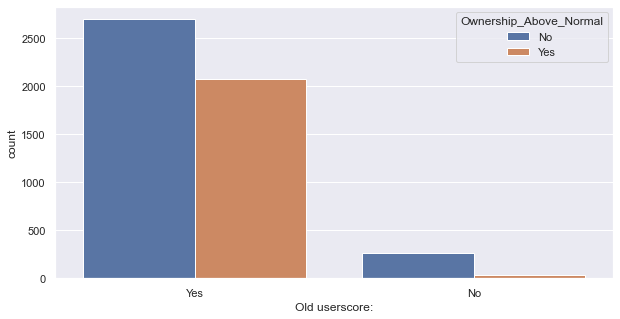

In [781]:
# This graph gives us a little glimps in how 'Old userscore' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(10,5))
sns.countplot(x=X_train_70['Old userscore:'], hue=y_train_70, orient="h")
plt.show()

All data is either 'yes' or 'no', so we continue

### Peak concurrent players yesterday:

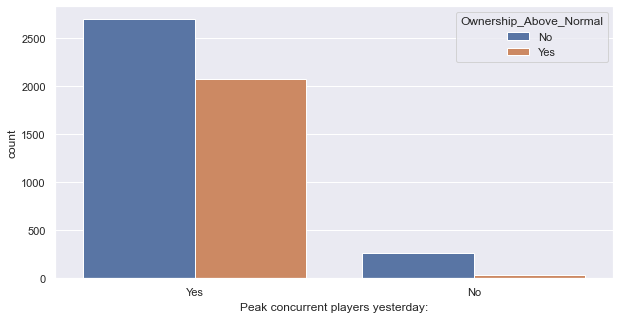

In [782]:
# This graph gives us a little glimps in how 'Peak concurrent players yesterday:' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(10,5))
sns.countplot(x=X_train_70['Peak concurrent players yesterday:'], hue=y_train_70, orient="h")
plt.show()

All data is either 'yes' or 'no', so we continue

### Genres:

In [783]:
# Here we isolate top 10 genres since there are more than 100 different combinations
top10Genres = list(X_train_70['Genres:'].value_counts().head(10).index)
top10Genres

['Action',
 'Action, Indie',
 'Adventure, Indie',
 'Action, Adventure, Indie',
 'Strategy',
 'Action, Adventure',
 'Casual, Indie',
 'Adventure',
 'Adventure, Casual, Indie',
 'Action, Casual, Indie']

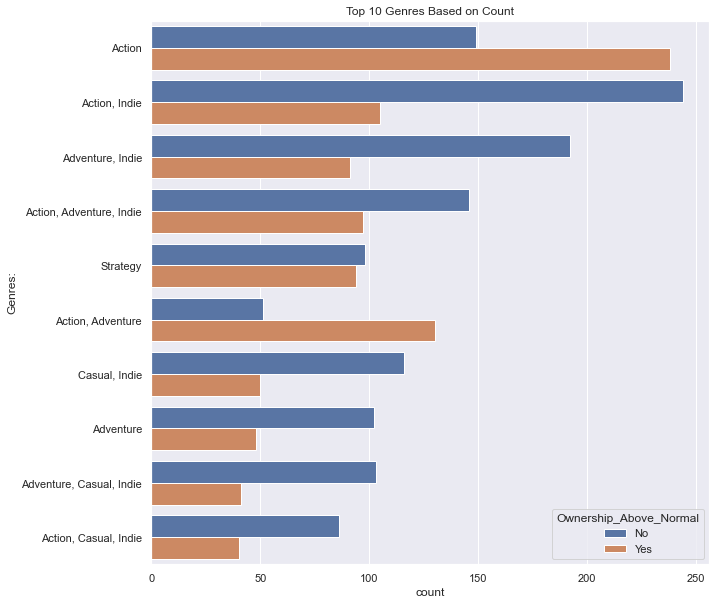

In [785]:
# This graph gives us a little glimps in how 'Genres:' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(10,10))
sns.countplot(y=X_train_70['Genres:'], hue=y_train_70, orient="v", order=top10Genres)
plt.title('Top 10 Genres Based on Count')
plt.show()

All data is either 'yes' or 'no', or the 'other' data is large enough to be its own column, so we continue

### TopTag:

In [786]:
# Top 10 tags
top10Tags = list(X_train_70['TopTag:'].value_counts().head(10).index)
top10Tags

['Action',
 'Indie',
 'Strategy',
 'Adventure',
 'Casual',
 'RPG',
 'Simulation',
 'Racing',
 'Horror',
 'Early Access']

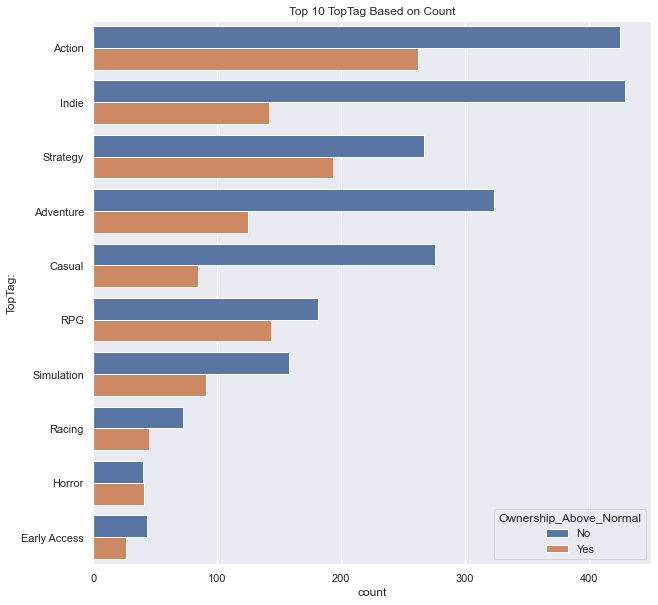

In [788]:
# This graph gives us a little glimps in how 'TopTag:' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(10,10))
sns.countplot(y=X_train_70['TopTag:'], hue=y_train_70, orient="v", order=top10Tags)
plt.title('Top 10 TopTag Based on Count')
plt.show()

All data is either 'yes' or 'no', so we continue

### Day:

In [711]:
X_train_70['Day:'].value_counts()

Thu      1207
Tue      1112
Fri      1073
Wed       781
Mon       708
Sun        86
Sat        81
Other      15
Name: Day:, dtype: int64

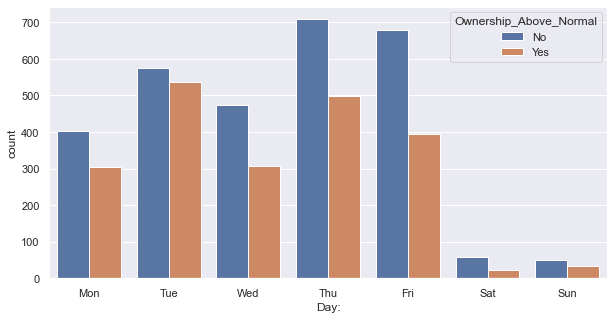

In [712]:
# This graph gives us a little glimps in how 'Day:' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(10,5))
sns.countplot(x=X_train_70['Day:'], hue=y_train_70, orient="h", order=['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.show()

In [713]:
y[X['Day:']=='Other'].value_counts()

Yes    11
No     10
Name: Ownership_Above_Normal, dtype: int64

All data is either 'yes' or 'no' and other is insignificant so we continue

### Month:

In [714]:
X_train_70['Month:'].value_counts()

Sep      512
Oct      511
Nov      478
May      470
Aug      443
Mar      419
Apr      409
Feb      392
Jun      377
Jul      366
Dec      361
Jan      310
Other     15
Name: Month:, dtype: int64

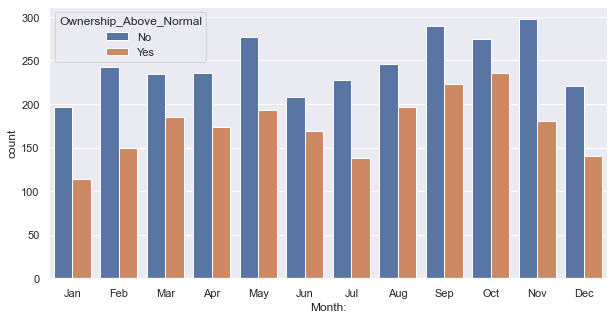

In [715]:
# This graph gives us a little glimps in how 'Month:' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(10,5))
sns.countplot(x=X_train_70['Month:'], hue=y_train_70, orient="h", order=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul',
                                                                         'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

In [716]:
y[X['Month:']=='Other'].value_counts()

Yes    11
No     10
Name: Ownership_Above_Normal, dtype: int64

All data is either 'yes' or 'no' and other is insignificant so we continue

### Year:

In [717]:
# Sort the years numerically
Years_sorted = [str(x) for x in sorted([int(x) for x in list(X_train_70['Year:'].value_counts().index) if x != 'Other'], reverse=True)]
Years_sorted

['2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1997',
 '1996',
 '1995',
 '1994',
 '1993',
 '1992',
 '1991',
 '1990',
 '1989',
 '1988',
 '1987',
 '1985',
 '1983']

In [718]:
# add other
Years_sorted.append('Other')
Years_sorted

['2021',
 '2020',
 '2019',
 '2018',
 '2017',
 '2016',
 '2015',
 '2014',
 '2013',
 '2012',
 '2011',
 '2010',
 '2009',
 '2008',
 '2007',
 '2006',
 '2005',
 '2004',
 '2003',
 '2002',
 '2001',
 '2000',
 '1999',
 '1998',
 '1997',
 '1996',
 '1995',
 '1994',
 '1993',
 '1992',
 '1991',
 '1990',
 '1989',
 '1988',
 '1987',
 '1985',
 '1983',
 'Other']

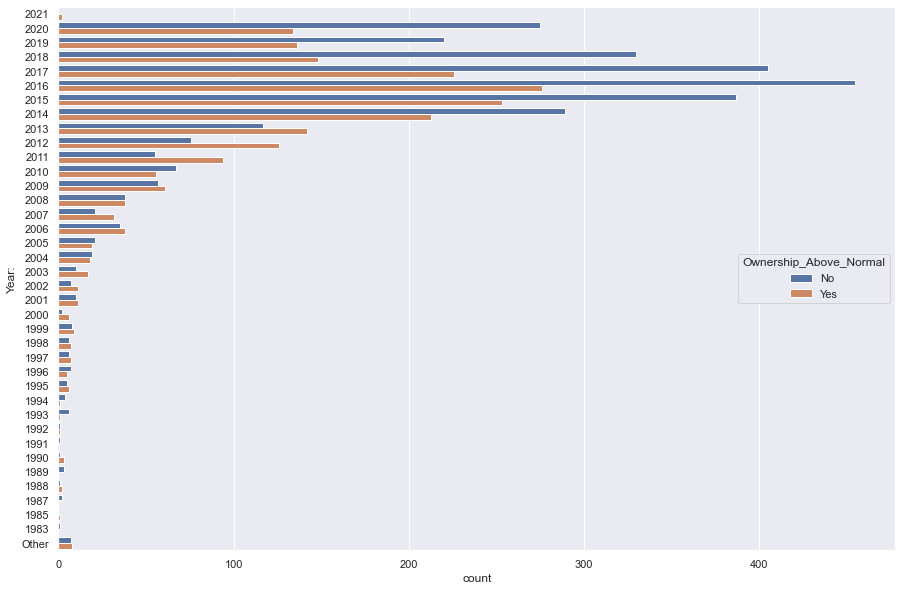

In [719]:
# This graph gives us a little glimps in how 'Year:' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(15,10))
sns.countplot(y=X_train_70['Year:'], hue=y_train_70, orient="v", order= Years_sorted)
plt.show()

In [720]:
y[X['Year:']=='Other'].value_counts()

Yes    11
No     10
Name: Ownership_Above_Normal, dtype: int64

All data is either 'yes' or 'no', and 'Other' is large so we continue

### YouTube(Views):

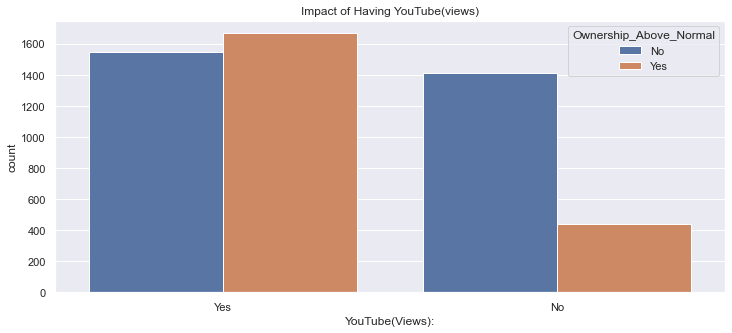

In [792]:
# This graph gives us a little glimps in how 'YouTube(Views):' correlates with or target variable, 'Ownership_Above_Normal'.
plt.figure(figsize=(12,5))
sns.countplot(x=X_train_70['YouTube(Views):'], hue=y_train_70, orient="h")
plt.title('Impact of Having YouTube(views)')
plt.show()

All data is either 'yes' or 'no', so we continue

## Official Exploratory Data Analysis
### The 'Genres' and 'TopTag'
We will take a quick look at how tags can affect the top 10 genre combinations

In [722]:
X_train_70.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5063 entries, 5576 to 4514
Data columns (total 13 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Price:                              5063 non-null   float64
 1   Old userscore:                      5063 non-null   object 
 2   Peak concurrent players yesterday:  5063 non-null   object 
 3   Genres:                             5063 non-null   object 
 4   NumOfGenres:                        5063 non-null   float64
 5   NumOfLanguages:                     5063 non-null   float64
 6   TopTag:                             5063 non-null   object 
 7   NumOfTags:                          5063 non-null   float64
 8   NumOfCats:                          5063 non-null   float64
 9   Month:                              5063 non-null   object 
 10  Day:                                5063 non-null   object 
 11  Year:                               5063

In [723]:
X['Genres:'].value_counts().head(10)

Action                      543
Action, Indie               494
Adventure, Indie            401
Action, Adventure, Indie    368
Strategy                    275
Action, Adventure           254
Casual, Indie               247
Adventure                   203
Adventure, Casual, Indie    201
Action, Casual, Indie       182
Name: Genres:, dtype: int64

In [724]:
pd.concat([X_train_70.loc[:, ['Genres:', 'TopTag:']], y_train_70], axis=1)['TopTag:'].value_counts().head(20)

Action              687
Indie               571
Strategy            460
Adventure           448
Casual              360
RPG                 324
Simulation          249
Racing              117
Horror               81
Early Access         69
Puzzle               60
Sexual Content       58
FPS                  58
Anime                52
Sports               50
Survival             44
Open World           42
Visual Novel         40
Platformer           37
Action Roguelike     37
Name: TopTag:, dtype: int64

Thanks to [Serenity](https://stackoverflow.com/questions/44880444/how-to-increase-the-font-size-of-the-legend-in-my-seaborn-plot#comment101763170_44882373), [Martin](https://www.drawingfromdata.com/how-to-rotate-axis-labels-in-seaborn-and-matplotlib), and inspiration from [Tarek Dib](https://github.com/TarekDib03/titanic-EDA/blob/master/Titanic%20-%20Project.ipynb), we are able to create the below visuals:

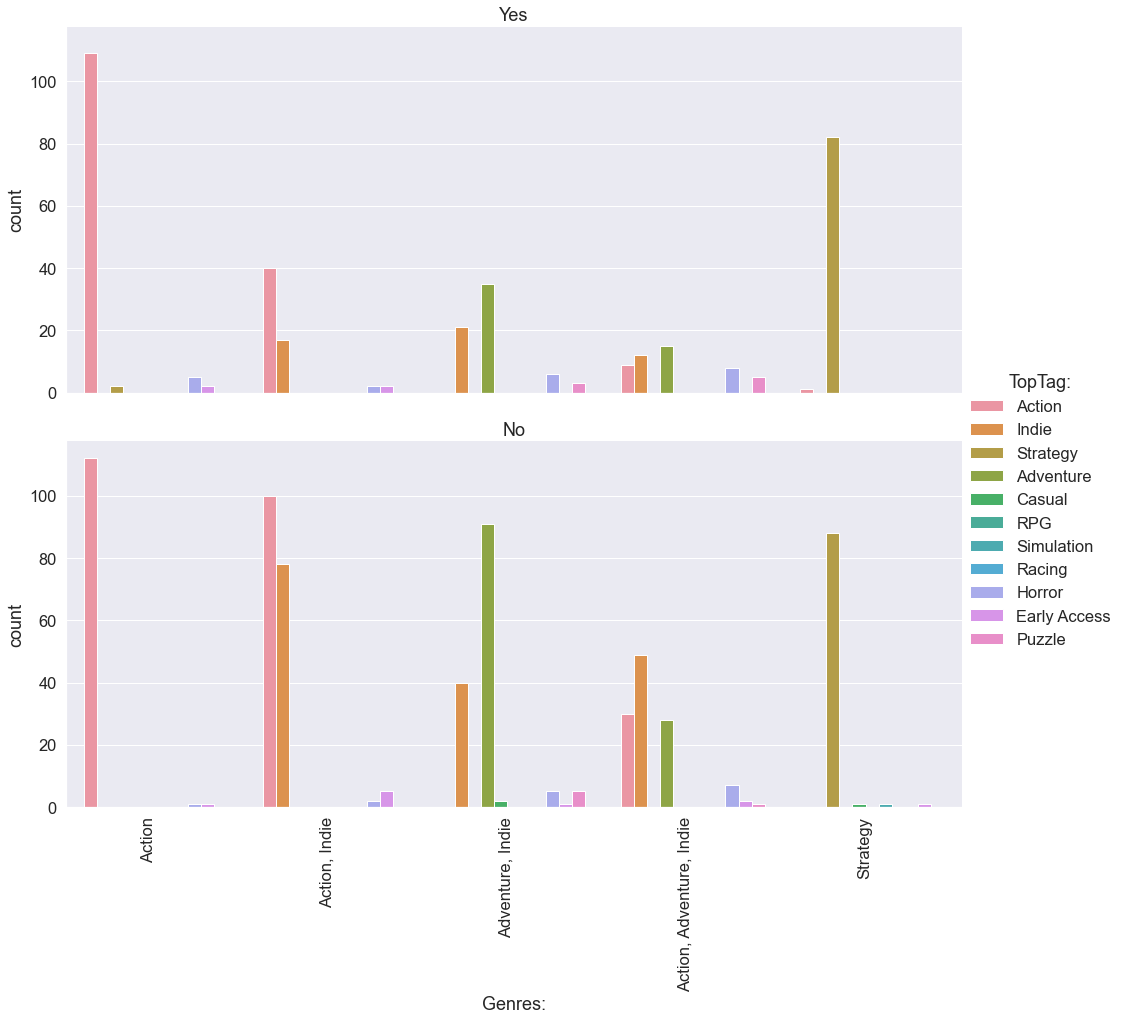

In [725]:
sns.set(font_scale=1.5) #this sets the font size of the graph
graph = sns.catplot(x='Genres:', row='Ownership_Above_Normal', orient="h",
            data=pd.concat([X_train_70.loc[:, ['Genres:', 'TopTag:']], y_train_70], axis=1), hue='TopTag:', hue_order=top40Tags[0:11],
            kind='count', height=6, aspect=2.25, sharey=True, row_order=['Yes', 'No'], order=top40Genres[0:5])
#plt.setp(graph._legend.get_title(), fontsize=20) #this resizes the legend font size

# here we rotate all the labels
for axes in graph.axes.flat:
    axes.set_xticklabels(axes.get_xticklabels(), rotation=90, horizontalalignment='right')
    axes.set_title(axes.get_title().split()[-1].title())
    
plt.show()

From the above graph we can kind of see that a game with 'Action' genre tagged with 'Strategy' , 'Horror', and 'Early Access' had higher quotient of 'Yes'

# Feature Engineering
we are tasked with selecting important features and constructing more meaningful ones using our data.

## Transforming Categorical Variables
we will go ahead and transform all our categorical variables with One Hot Encoding. NOTE: we could use label encoding, but we would have to assume ordinal factors that are not really clear for each variable. Doing one hot encoding does not biased our models which can happen with ordinal data.

In [726]:
# Here we look at the data types
X_train_70.dtypes

Price:                                float64
Old userscore:                         object
Peak concurrent players yesterday:     object
Genres:                                object
NumOfGenres:                          float64
NumOfLanguages:                       float64
TopTag:                                object
NumOfTags:                            float64
NumOfCats:                            float64
Month:                                 object
Day:                                   object
Year:                                  object
YouTube(Views):                        object
dtype: object

In [727]:
X_train_70['Year:'].value_counts()

2016     731
2015     640
2017     631
2014     502
2018     478
2020     409
2019     356
2013     259
2012     202
2011     149
2010     123
2009     118
2008      76
2006      73
2007      53
2005      40
2004      37
2003      27
2001      21
2002      18
1999      17
Other     15
1998      13
1997      13
1996      12
1995      11
2000       8
1993       7
1994       5
1990       4
1989       3
1988       3
2021       2
1992       2
1987       2
1983       1
1985       1
1991       1
Name: Year:, dtype: int64

In [728]:
X_test_30['Genres:'].value_counts()

Action                                                    156
Action, Indie                                             145
Action, Adventure, Indie                                  125
Adventure, Indie                                          118
Strategy                                                   83
                                                         ... 
Action, Adventure, Casual, Indie, Simulation, Strategy      1
Action, Adventure, Indie, Racing, Simulation, Sports        1
Action, Simulation, Sports                                  1
Action, Indie, RPG, Simulation                              1
Adventure, Casual, RPG, Simulation, Strategy                1
Name: Genres:, Length: 194, dtype: int64

In [729]:
X_train_70

,Price:,Old userscore:,Peak concurrent players yesterday:,Genres:,NumOfGenres:,NumOfLanguages:,TopTag:,NumOfTags:,NumOfCats:,Month:,Day:,Year:,YouTube(Views):
5576,2.993730,Yes,Yes,Action,1.000000,2.236068,FPS,4.472136,2.645751,Jun,Mon,2011,Yes
5651,-0.010050,Yes,Yes,Indie,1.000000,2.236068,Indie,3.000000,2.000000,Apr,Wed,2010,Yes
4403,2.889816,Yes,Yes,"Racing, Simulation, Sports",1.732051,1.414214,Racing,2.645751,2.449490,Jun,Thu,2019,Yes
887,1.095273,Yes,No,"Adventure, Indie",1.414214,2.449490,Indie,3.316625,1.732051,Jan,Thu,2015,Yes
4272,1.790091,Yes,Yes,"Adventure, Casual, Indie",1.732051,1.000000,Indie,3.872983,2.000000,Aug,Thu,2017,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3473,1.095273,Yes,Yes,"Adventure, Indie",1.414214,2.645751,Adventure,2.000000,2.000000,Mar,Thu,2017,No
343,3.688629,Yes,Yes,"Massively Multiplayer, Racing",1.414214,3.162278,Racing,4.123106,2.449490,Mar,Thu,2016,Yes
6336,3.911623,Yes,Yes,Adventure,1.000000,2.000000,Sexual Content,4.472136,1.414214,Apr,Sun,2018,No
899,1.607436,Yes,Yes,Indie,1.000000,1.000000,Indie,1.732051,1.414214,Nov,Tue,2014,Yes


In [730]:
X_train_70 = X_train_70.reset_index(drop=True)

In [731]:
X_train_70

,Price:,Old userscore:,Peak concurrent players yesterday:,Genres:,NumOfGenres:,NumOfLanguages:,TopTag:,NumOfTags:,NumOfCats:,Month:,Day:,Year:,YouTube(Views):
0,2.993730,Yes,Yes,Action,1.000000,2.236068,FPS,4.472136,2.645751,Jun,Mon,2011,Yes
1,-0.010050,Yes,Yes,Indie,1.000000,2.236068,Indie,3.000000,2.000000,Apr,Wed,2010,Yes
2,2.889816,Yes,Yes,"Racing, Simulation, Sports",1.732051,1.414214,Racing,2.645751,2.449490,Jun,Thu,2019,Yes
3,1.095273,Yes,No,"Adventure, Indie",1.414214,2.449490,Indie,3.316625,1.732051,Jan,Thu,2015,Yes
4,1.790091,Yes,Yes,"Adventure, Casual, Indie",1.732051,1.000000,Indie,3.872983,2.000000,Aug,Thu,2017,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,1.095273,Yes,Yes,"Adventure, Indie",1.414214,2.645751,Adventure,2.000000,2.000000,Mar,Thu,2017,No
5059,3.688629,Yes,Yes,"Massively Multiplayer, Racing",1.414214,3.162278,Racing,4.123106,2.449490,Mar,Thu,2016,Yes
5060,3.911623,Yes,Yes,Adventure,1.000000,2.000000,Sexual Content,4.472136,1.414214,Apr,Sun,2018,No
5061,1.607436,Yes,Yes,Indie,1.000000,1.000000,Indie,1.732051,1.414214,Nov,Tue,2014,Yes


In [732]:
X_test_30 = X_test_30.reset_index(drop=True)
X_test_30

,Price:,Old userscore:,Peak concurrent players yesterday:,Genres:,NumOfGenres:,NumOfLanguages:,TopTag:,NumOfTags:,NumOfCats:,Month:,Day:,Year:,YouTube(Views):
0,1.095273,Yes,Yes,"Casual, Indie, Strategy",1.732051,1.000000,Casual,2.449490,1.732051,Jun,Wed,2016,No
1,2.301585,Yes,Yes,"Action, Adventure, Casual, Indie, RPG",2.236068,3.741657,Action,4.000000,2.000000,Jan,Thu,2016,No
2,2.297573,Yes,Yes,"Indie, Simulation",1.414214,3.000000,Hacking,4.472136,2.645751,Aug,Wed,2015,Yes
3,2.298577,Yes,Yes,"Action, RPG",1.414214,1.732051,RPG,3.000000,1.414214,Nov,Tue,2009,Yes
4,2.297573,Yes,Yes,"Indie, Racing",1.414214,1.414214,Racing,2.236068,3.464102,Jun,Fri,2014,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,0.688135,Yes,Yes,"Casual, Indie",1.414214,1.000000,Casual,2.236068,1.414214,Jun,Mon,2011,Yes
2166,3.400864,Yes,Yes,"Indie, RPG, Strategy",1.732051,2.449490,RPG,4.472136,2.000000,Apr,Thu,2017,Yes
2167,2.705380,Yes,Yes,"Action, Adventure, Indie",1.732051,1.000000,Platformer,4.472136,3.000000,Apr,Tue,2012,No
2168,-0.010050,Yes,Yes,"Action, Casual, Indie",1.732051,1.732051,Action,2.645751,1.732051,Apr,Tue,2016,No


In [733]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
# creating instance of one-hot-encoder
enc = OneHotEncoder(handle_unknown='ignore')

# passing 'object' columns 
catvar1 =  X_train_70.select_dtypes(include='object').columns
enc_df = pd.DataFrame(enc.fit_transform(X_train_70[catvar1]).toarray())

# Concat continuous columns with one hot encoded columns
preprocessed1 = X_train_70.copy()
preprocessed1 = preprocessed1.drop(columns=catvar1)
processed_X_train_70 = preprocessed1.join(enc_df)
processed_X_train_70

,Price:,NumOfGenres:,NumOfLanguages:,NumOfTags:,NumOfCats:,0,1,2,3,4,...,548,549,550,551,552,553,554,555,556,557
0,2.993730,1.000000,2.236068,4.472136,2.645751,0.0,1.0,0.0,1.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,-0.010050,1.000000,2.236068,3.000000,2.000000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,2.889816,1.732051,1.414214,2.645751,2.449490,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,1.095273,1.414214,2.449490,3.316625,1.732051,0.0,1.0,1.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,1.790091,1.732051,1.000000,3.872983,2.000000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5058,1.095273,1.414214,2.645751,2.000000,2.000000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
5059,3.688629,1.414214,3.162278,4.123106,2.449490,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
5060,3.911623,1.000000,2.000000,4.472136,1.414214,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
5061,1.607436,1.000000,1.000000,1.732051,1.414214,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [734]:
enc_test_df = pd.DataFrame(enc.transform(X_test_30[catvar1]).toarray())

# Concat continuous columns with one hot encoded columns
preprocessed1 = X_test_30.copy()
preprocessed1 = preprocessed1.drop(columns=catvar1)
processed_X_test_30 = preprocessed1.join(enc_test_df)
processed_X_test_30

,Price:,NumOfGenres:,NumOfLanguages:,NumOfTags:,NumOfCats:,0,1,2,3,4,...,548,549,550,551,552,553,554,555,556,557
0,1.095273,1.732051,1.000000,2.449490,1.732051,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,2.301585,2.236068,3.741657,4.000000,2.000000,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,2.297573,1.414214,3.000000,4.472136,2.645751,0.0,1.0,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,2.298577,1.414214,1.732051,3.000000,1.414214,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,2.297573,1.414214,1.414214,2.236068,3.464102,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2165,0.688135,1.414214,1.000000,2.236068,1.414214,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2166,3.400864,1.732051,2.449490,4.472136,2.000000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2167,2.705380,1.732051,1.000000,4.472136,3.000000,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2168,-0.010050,1.732051,1.732051,2.645751,1.732051,0.0,1.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [735]:
object_columns = catvar1
object_columns

Index(['Old userscore:', 'Peak concurrent players yesterday:', 'Genres:',
       'TopTag:', 'Month:', 'Day:', 'Year:', 'YouTube(Views):'],
      dtype='object')

In [736]:
decoder_array = enc.get_feature_names()
decoder_array

array(['x0_No', 'x0_Yes', 'x1_No', 'x1_Yes', 'x2_Action',
       'x2_Action, Adventure', 'x2_Action, Adventure, Casual',
       'x2_Action, Adventure, Casual, Indie',
       'x2_Action, Adventure, Casual, Indie, Massively Multiplayer, RPG, Simulation',
       'x2_Action, Adventure, Casual, Indie, Massively Multiplayer, RPG, Simulation, Strategy',
       'x2_Action, Adventure, Casual, Indie, Massively Multiplayer, RPG, Strategy',
       'x2_Action, Adventure, Casual, Indie, Massively Multiplayer, Racing',
       'x2_Action, Adventure, Casual, Indie, Massively Multiplayer, Racing, RPG, Simulation, Sports, Strategy',
       'x2_Action, Adventure, Casual, Indie, Massively Multiplayer, Racing, RPG, Simulation, Strategy',
       'x2_Action, Adventure, Casual, Indie, Massively Multiplayer, Simulation, Sports, Strategy',
       'x2_Action, Adventure, Casual, Indie, RPG',
       'x2_Action, Adventure, Casual, Indie, RPG, Simulation',
       'x2_Action, Adventure, Casual, Indie, RPG, Simulation,

## Store Variables for Next Notebook
From here, we can move on to the our predictive modeling in [Predcitive_Modeling.ipynb](./Predictive_Modeling.ipynb). Here, we will store our variables for use elsewhere.

In [737]:
#%store -z #This removes all previously stored variables
#%store #This allows you to see all previously stored variables

%store processed_X_train_70
%store processed_X_test_30
%store y_train_70 
%store y_test_30
%store decoder_array
%store object_columns

Stored 'processed_X_train_70' (DataFrame)
Stored 'processed_X_test_30' (DataFrame)
Stored 'y_train_70' (Series)
Stored 'y_test_30' (Series)
Stored 'decoder_array' (ndarray)
Stored 'object_columns' (Index)


## Other Resources:
* https://towardsdatascience.com/understanding-random-forest-58381e0602d2
* https://www.semanticscholar.org/paper/Using-data-mining-for-bank-direct-marketing%3A-an-of-Moro-Laureano/a175aeb08734fd669beaffd3d185a424a6f03b84
* https://pdfs.semanticscholar.org/1999/417377ec21ecf7f7f55af62975065f785fb2.pdf
